## Open db and read LV_reviews table created in sqloader
LV_Reviews is join of reviews on LV_Businesses <br>
LV_Businesses is new table created from exported Las Vegas business subset json

In [2]:
%%time
import pandas as pd
import gc
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            return conn

conn = create_connection(r"C:\Users\pajuc\Documents\yelp\data\yelp.db")
c = conn.cursor()

2.6.0
Wall time: 1.76 s


In [3]:
%%time
#rev0 =  pd.read_sql_query("Select * from LV_Reviews", conn)
conn.close()

Wall time: 999 µs


Wall time: 76.1 ms


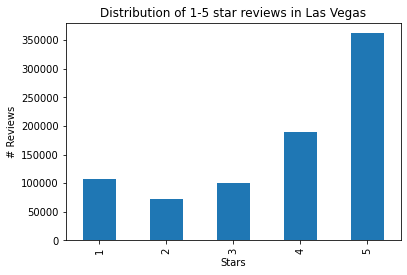

In [4]:
%%time
fig = rev0['stars'].value_counts().sort_index().plot(kind='bar',xlabel="Stars", ylabel="# Reviews", title="Distribution of 1-5 star reviews in Las Vegas")

In [5]:
import nltk
import string
import re

In [7]:
# ntlk requested install via this statement
#nltk.download('stopwords')

In [13]:
# ntlk requested install via this statement
#nltk.download('stopwords')

### Simply Review text
(takes about 8 minutes to run)

In [8]:
%%time
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                 
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)

i = nltk.corpus.stopwords.words('english')
j = list(string.punctuation)
stopwords = set(i).union(j)

#simplifies review text to lowercase, removes symbols and stopwords
#rev0['text2'] = rev0['text'].apply(preprocess)

Wall time: 7min 50s


In [9]:
#take a look at what is being filtered out
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Analyze sentiment on simplified review text
(takes about 8 minutes to run)

In [10]:
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment 

In [11]:
%%time
# creates new column on simple text for sentiment scores
# takes a bit to run
rev0['senti_score'] = rev0['text2'].apply(senti)

Wall time: 7min 59s


### Seperate sentiment tuple into two new columes for ease of use
I also threw this full df into a .csv to avoid re-running the above code

In [12]:
# seperate sentiment score tuple into two new columns
rev0[['polarity', 'subjectivity']] = pd.DataFrame(rev0['senti_score'].tolist(), index=rev0.index)

In [18]:
rev0.groupby('stars')['polarity'].mean()

stars
1   -0.051413
2    0.088804
3    0.192460
4    0.289899
5    0.376189
Name: polarity, dtype: float64

In [6]:
# rev0.to_csv("C:\\Users\\pajuc\\Documents\\yelp\\data\\rev_sent.csv")
df = pd.read_csv("C:\\Users\\pajuc\\Documents\\yelp\\data\\rev_sent.csv")

In [6]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,longitude,review_count,is_open,attributes,categories,hours,text2,senti_score,polarity,subjectivity
0,0,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00,...,-115.154021,1120,1,"{""RestaurantsTakeOut"": ""True"", ""BusinessAccept...","Mexican, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",pm super bowl sunday theyre already closed wea...,"Sentiment(polarity=-0.10833333333333334, subje...",-0.108333,0.483333
1,1,TeX0eOIeZb_wpo86rCedXQ,RR-2nouBn408e3djxC470g,d4qwVw4PcN-_2mK2o1Ro1g,5,0,0,0,Holy heck this place is amazing. I love their ...,2017-02-09 04:25:03,...,-115.154021,1120,1,"{""RestaurantsTakeOut"": ""True"", ""BusinessAccept...","Mexican, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",holy heck place amazing love chicken tacos the...,"Sentiment(polarity=0.3375, subjectivity=0.8250...",0.337500,0.825000
2,2,NHQWhZve7UEaGLt7IwAyDw,H3wPBzQCKCKiHcV7GZK4kg,LkMtMHVetws5_7QfRjPtlg,2,5,3,4,This actually used to be one of my favorite ho...,2011-01-09 00:09:50,...,-115.151253,944,0,"{""NoiseLevel"": ""u'average'"", ""RestaurantsDeliv...","Casinos, Nightlife, Restaurants, Hotels & Trav...","{""Monday"": ""6:0-6:0"", ""Tuesday"": ""6:0-6:0"", ""W...",actually used one favorite hotelcasinos back d...,"Sentiment(polarity=0.05422278338945006, subjec...",0.054223,0.602623
3,3,TkcxD1A4N_9kRZwGhUjDKA,bgG0jJyUXta_kczGrQW2Rw,7EZ4Eu7YJ1ltRCC5jXFJrQ,1,1,0,0,There wasn't one specific thing that made this...,2013-04-10 16:19:12,...,-115.171991,824,1,"{""NoiseLevel"": ""u'average'"", ""RestaurantsDeliv...","Asian Fusion, Event Planning & Services, Resta...","{""Monday"": ""7:0-22:0"", ""Tuesday"": ""7:0-22:0"", ...",wasnt one specific thing made buffet horrible ...,"Sentiment(polarity=-0.027380952380952374, subj...",-0.027381,0.430536
4,4,8qdikDQ0bkJj7QZa2IdvrQ,7MXunAzrmnbBd0XQR33zaA,nJcyfIRGbI31EGLzillWYg,1,0,0,0,A margarita in clear plastic dickie cup??? Wtf...,2015-01-18 16:12:27,...,-115.163311,448,1,"{""Ambience"": ""{'touristy': True, 'hipster': Fa...","Breakfast & Brunch, Nightlife, Bars, American ...","{""Monday"": ""7:0-0:0"", ""Tuesday"": ""7:0-0:0"", ""W...",margarita clear plastic dickie cup wtf drunkin...,"Sentiment(polarity=-0.19999999999999998, subje...",-0.200000,0.691667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831365,831365,VqakFYSNxHlocHPk5VHgdw,FLHLNzH_jCdM4Ag_hz6wcg,xfWdUmrz2ha3rcigyITV0g,5,0,0,0,Absolutely fantastic!!! I tried the impossibl...,2019-12-11 16:54:04,...,-115.172268,3000,1,"{""HasTV"": ""True"", ""RestaurantsGoodForGroups"": ...","American (Traditional), Burgers, Restaurants","{""Monday"": ""10:30-0:0"", ""Tuesday"": ""10:30-0:0""...",absolutely fantastic tried impossible burger h...,"Sentiment(polarity=0.3055555555555556, subject...",0.305556,0.508333
831366,831366,cgwgIXPlwd3TFQzpkIF0vg,KEUHEu0zR6kEH89P_Wlbhw,h7s4MRVvB726jWHCHiQ9kw,1,0,0,0,If I could give 0 stars I would . I had a very...,2019-12-13 04:35:36,...,-115.175377,1001,1,"{""RestaurantsTableService"": ""True"", ""Wheelchai...","Steakhouses, Restaurants, Event Planning & Ser...","{""Monday"": ""17:0-22:0"", ""Tuesday"": ""17:0-22:0""...",could give stars would bad experience becarefu...,"Sentiment(polarity=-0.16190476190476186, subje...",-0.161905,0.361905
831367,831367,bngbCQt8qCpooXrms68RJA,BI4jBJVto2tEQ0NiaR0rNQ,zdE82PiD6wquvjYLyhOJNA,3,4,3,2,I know I'm going to hear crap for only giving ...,2013-06-14 05:36:19,...,-115.206417,1345,1,"{""Alcohol"": ""u'none'"", ""GoodForKids"": ""True"", ...","Asian Fusion, Mexican, Restaurants, Korean","{""Monday"": ""11:0-20:0"", ""Tuesday"": ""11:0-20:0""...",know im going hear crap giving place stars foo...,"Sentiment(polarity=0.18526406926406927, subjec...",0.185264,0.517087
831368,831368,T34JvlaKD1qcQARVOOHm4w,7puz3FPymI83yvk1_J7ilQ,AUOlD

In [21]:
# del rev0
# df.head()

### Couple different looks at the sentiment and location

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Las Vegas')

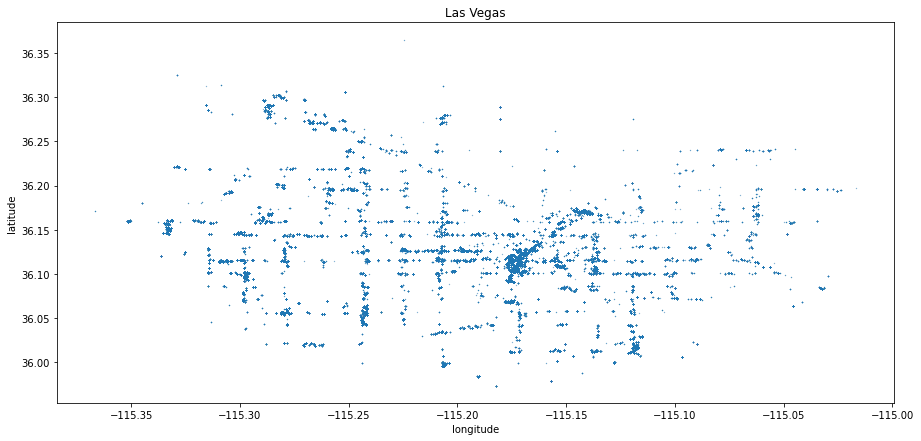

In [23]:
f, ax1 = plt.subplots(1, 1, figsize=(15,7))
df.plot(kind='scatter', x='longitude', y='latitude', s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("Las Vegas")

<AxesSubplot:title={'center':'Las Vegas'}, xlabel='longitude', ylabel='latitude'>

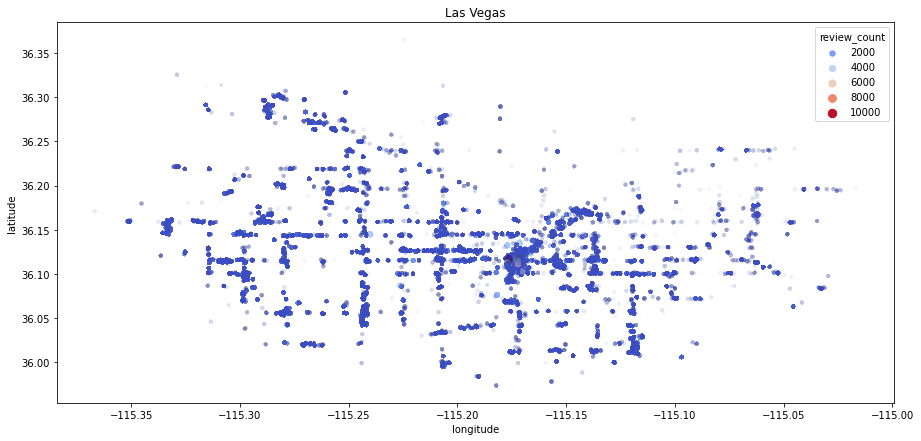

In [233]:
f, ax1 = plt.subplots(1, 1, figsize=(15,7))
ax1.set_title("Las Vegas")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='review_count', size='review_count', palette='coolwarm', alpha=0.01)

In [ ]:
f, ax1 = plt.subplots(1, 1, figsize=(15,7))
ax1.set_title("Las Vegas")
sns.scatterplot(data=df[df.stars==2], x='longitude', y='latitude', hue='polarity', palette='Spectral')

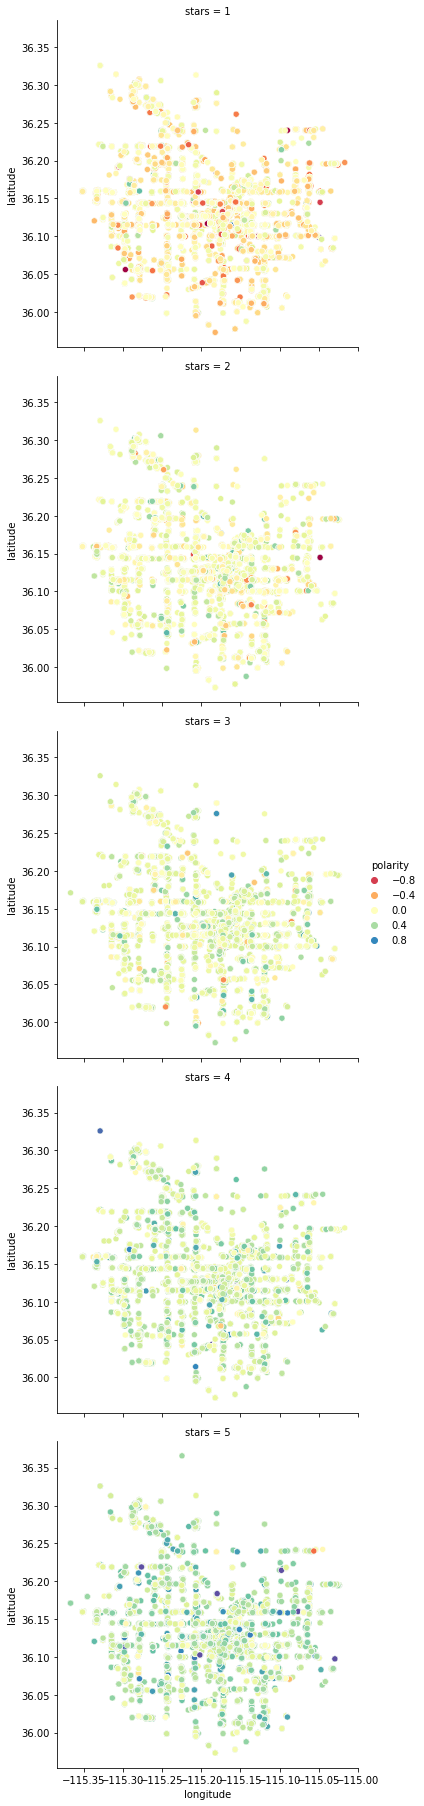

In [422]:
sns.relplot(
    data=df, x='longitude', y='latitude', hue='polarity',
    col="stars", palette='Spectral',
    kind="scatter", col_wrap=1
)

All areas contain 1-5 star businesses. Sentiment varies over whole range for these business as well.
Maybe using 'quality' reviewers will clean this up a bit.

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [81]:
#df.dtypes

In [114]:
business_list = df['name'].drop_duplicates()

In [115]:
business_list

0                                    Pink Taco
2               LVH - Las Vegas Hotel & Casino
3                         Corner Market Buffet
4         Vince Neil's Tatuado EAT DRINK PARTY
5                                  Dirty South
                          ...                 
810514            MYTH: Legends of the Artisan
811511         Haddies Car Wash El Capitan Way
812495                 Honolulu Cookie Company
813518                  The Underground Lounge
814195                          La Rosticceria
Name: name, Length: 3038, dtype: object

<AxesSubplot:xlabel='date', ylabel='polarity'>

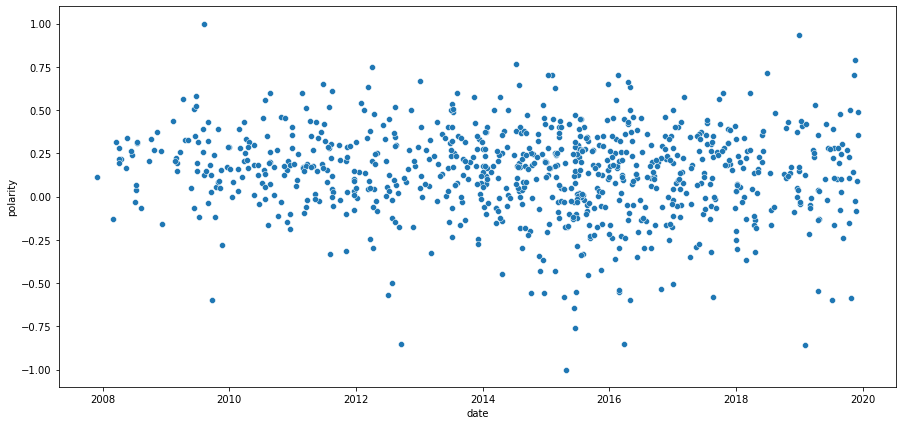

In [10]:
f, ax1 = plt.subplots(1, 1, figsize=(15,7))

sns.scatterplot(data=df[df.name=='Corner Market Buffet'], x='date', y='polarity')

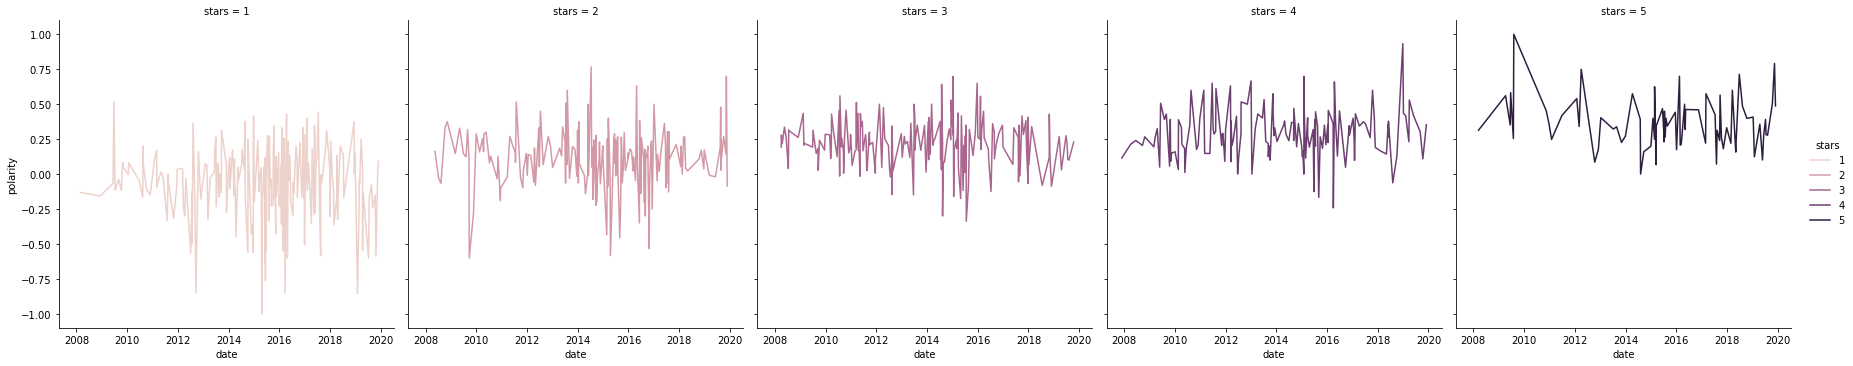

In [11]:
sns.relplot(data=df[df.name=='Corner Market Buffet'], x='date', y='polarity', kind='line', col='stars', hue='stars')

In [12]:
#df2 is placeholder for original dataframe. little faster to recreate from here than read_csv
df2 = df.copy()

In [13]:
#all plotting libraries render datetime format much quicker, this also creates more/easier categories to use
df=df2.copy()
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [14]:
top_names = df.sort_values('review_count', ascending=False).name.unique()

In [15]:
df[df.name.isin(top_names[:10])]

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,is_open,attributes,categories,hours,text2,senti_score,polarity,subjectivity,year,month
62821,62821,R9SkOjO68gwkbqKrSh6luA,upR56wFLwIXk7efFV6Nxcg,znWHLW1pt19HzW1VY6KfCA,1,0,0,0,Went for breakfast! Food was horrible! Service...,2014-04-01 03:15:50,...,1,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...","American (New), Breakfast & Brunch, American (...","{""Monday"": ""6:0-13:0"", ""Tuesday"": ""6:0-13:0"", ...",went breakfast food horrible service equally b...,"Sentiment(polarity=-0.6416666666666666, subjec...",-0.641667,0.766667,2014,4
62961,62961,5hsz_IpzehCA7V2Nh3oIUA,fFFTeVrZfTWuvbJXNKb-vQ,znWHLW1pt19HzW1VY6KfCA,4,0,0,0,Wow \nYou better be hungry to eat here \nPorti...,2016-03-07 00:56:10,...,1,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...","American (New), Breakfast & Brunch, American (...","{""Monday"": ""6:0-13:0"", ""Tuesday"": ""6:0-13:0"", ...",wow better hungry eat portions massive disappo...,"Sentiment(polarity=0.029166666666666657, subje...",0.029167,0.733333,2016,3
63025,63025,XSJu0bnNQWtAkOyZJ_sRMQ,ymVy0sYNjiJminA2oibSIw,znWHLW1pt19HzW1VY6KfCA,2,1,0,0,Came to the hash house on a recommendation fro...,2014-05-07 20:20:09,...,1,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...","American (New), Breakfast & Brunch, American (...","{""Monday"": ""6:0-13:0"", ""Tuesday"": ""6:0-13:0"", ...",came hash house recommendation local got bacon...,"Sentiment(polarity=0.395, subjectivity=0.74500...",0.395000,0.745000,2014,5
63033,63033,ZuKVB7qhNbSmh0AuWACqQg,AfQatT6_iMDgk8T1c-jaPg,znWHLW1pt19HzW1VY6KfCA,4,1,0,1,"The portions, the insanely huge pancakes and t...",2015-10-07 22:58:25,...,1,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...","American (New), Breakfast & Brunch, American (...","{""Monday"": ""6:0-13:0"", ""Tuesday"": ""6:0-13:0"", ...",portions insanely huge pancakes fact hotel mak...,"Sentiment(polarity=0.2733333333333333, subject...",0.273333,0.820000,2015,10
63215,63215,C41bJRn6_rIGSrrPEnqMwQ,CG2F4yJJYwhGcKnb8-bzGA,znWHLW1pt19HzW1VY6KfCA,3,0,0,0,Decent... had the scramble.. Waffles were soft...,2016-04-11 17:53:10,...,1,"{""GoodForKids"": ""True"", ""RestaurantsTakeOut"": ...","American (New), Breakfast & Brunch, American (...","{""Monday"": ""6:0-13:0"", ""Tuesday"": ""6:0-13:0"", ...",decent scramble waffles soft doughy went strip...,"Sentiment(polarity=0.13333333333333333, subjec...",0.133333,0.508333,2016,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831313,831313,lcLPKuOXmTilrAkr_LviNQ,JwwwERU1jVr48choIx9xjA,El4FC8jcawUVgw_0EIcbaQ,1,1,1,0,My window's motorized shade curtains did not w...,2019-11-17 18:16:34,...,1,"{""GoodForKids"": ""False"", ""Alcohol"": ""u'full_ba...","Event Planning & Services, Restaurants, Arts &...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",windows motorized shade curtains work maintena...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,2019,11
831322,831322,H1iJopcVwPBf3ANptBGPsg,F78tJHr0qW6FsYBtWMmLpA,El4FC8jcawUVgw_0EIcbaQ,4,11,6,10,This review is based on a brief visit for the ...,2018-08-18 23:27:44,...,1,"{""GoodForKids"": ""False"", ""Alcohol"": ""u'full_ba...","Event Planning & Services, Restaurants, Arts &...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",review based brief visit cirque du soleil show...,"Sentiment(polarity=0.20890151515151512, subjec...",0.208902,0.583243,2018,8
831327,831327,n5_uWiVUQRb3Kmw36Iv_aw,GOfPU3cSXrP27jmVQBAskA,El4FC8jcawUVgw_0EIcbaQ,1,2,0,0,"They don't care about loosing a customer, cust...",2019-09-12 15:40:15,...,1,"{""GoodForKids"": ""False"", ""Alcohol"": ""u'full_ba...","Event Planning & Services, Restaurants, Arts &...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""0:0-0:0"", ""W...",dont care loosing customer customers beware ch...,"Sentiment(polarity=-0.05, subjectivity=0.05)",-0.050000,0.050000,2019,9
831335,831335,N5f9aP2kvhlcv_J1KQm8Bw,Y5Q

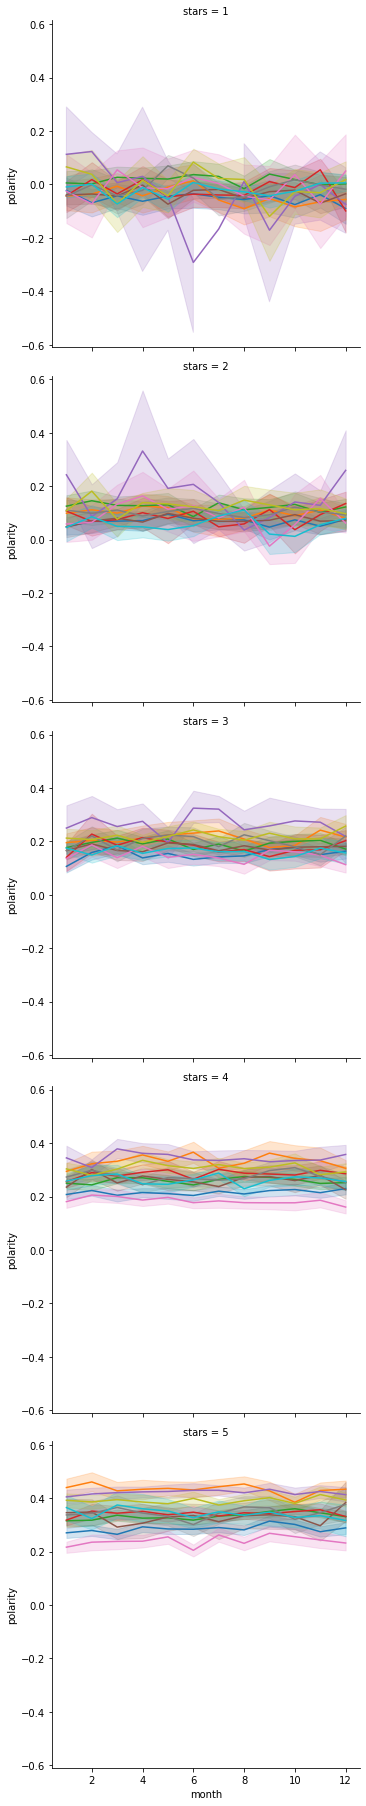

In [16]:
#didn't bother placing this into proper facetgrid, it's good enough for transferring the image elsewhere
sns.relplot(data=df[df.name.isin(top_names[:10])], x='month', y='polarity',hue='name',col='stars',col_wrap=1, kind='line',legend=False)

In [234]:
#useless graph....testing limits of 8gb ram
#sns.scatterplot(data=df, x='date', y='polarity', hue='stars')

In [20]:
#give my pc some help
gc.collect()

15

<AxesSubplot:xlabel='polarity', ylabel='Density'>

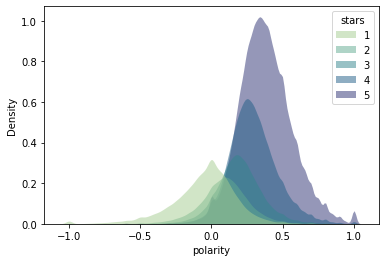

In [21]:
#note this is kde not normdist
sns.kdeplot(data=df, x='polarity', hue='stars',fill=True, palette="crest",
   alpha=.5, linewidth=0)

In [450]:
# using ntlk tokenizer and required this d/l
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pajuc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [86]:
#couple bad data types to weed out
df = df.loc[df.text2.apply(type) != float]

In [ ]:
def tokens(x):
    return nltk.word_tokenize(x)

df['tokens'] = df['text2'].apply(tokens)

In [ ]:
df.categories.count

In [105]:
slist1 = []
#kept filter on 1st list for category for info
for x in (df.loc[df['stars']==1&&df['categories']=='Mexican, Restaurants','tokens']):
    slist1.extend(x)
slist2 = []
for x in (df.loc[df['stars']==2,'tokens']):
    slist2.extend(x)
slist3 = []
for x in (df.loc[df['stars']==3,'tokens']):
    slist3.extend(x)
slist4 = []
for x in (df.loc[df['stars']==4,'tokens']):
    slist4.extend(x)
slist5 = []
for x in (df.loc[df['stars']==5,'tokens']):
    slist5.extend(x)

In [145]:
fdist_filtered = nltk.FreqDist(slist1)

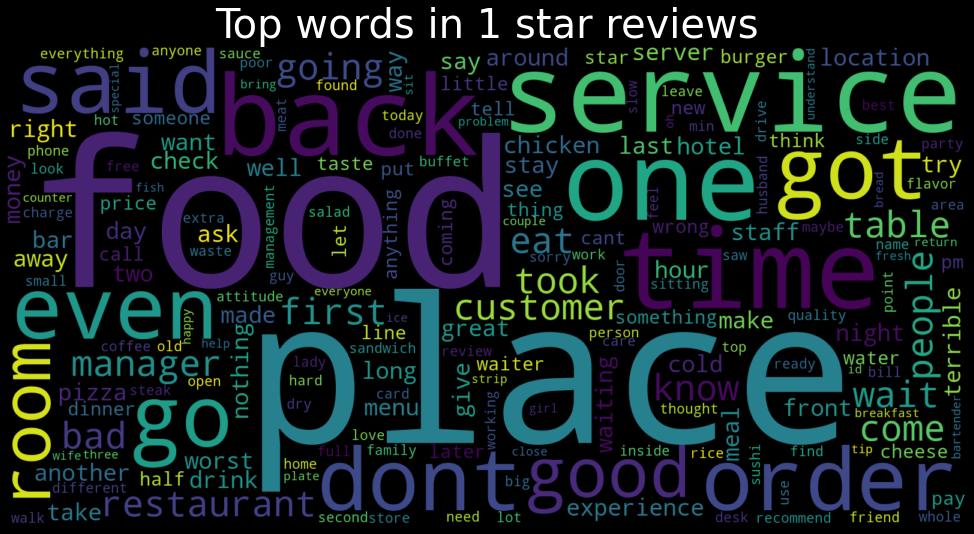

In [147]:
wc = WordCloud(width=1600, height=800, random_state=1)
wc.generate(" ".join([i[0] for i in fdist_filtered.most_common()]))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Top words in 1 star reviews", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

In [211]:
df1 = df[df['stars']==1]
df5 = df[df['stars']==5]

In [212]:
bad_mexi = df1[df1['categories']=='Mexican, Restaurants']
good_mexi = df5[df5['categories']=='Mexican, Restaurants']

In [216]:
bad_mexi

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,review_count,is_open,attributes,categories,hours,text2,senti_score,polarity,subjectivity,tokens
0,0,bVTjZgRNq8ToxzvtiVrqMA,2hRe26HSCAWbFRn5WChK-Q,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,10pm on a super bowl Sunday and they're alread...,2015-02-02 06:28:00,...,1120,1,"{""RestaurantsTakeOut"": ""True"", ""BusinessAccept...","Mexican, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",pm super bowl sunday theyre already closed wea...,"Sentiment(polarity=-0.10833333333333334, subje...",-0.108333,0.483333,"[pm, super, bowl, sunday, theyre, already, clo..."
531,531,LZvHa0wnjR6mg05Ll6YDOQ,HHwG0HdXzOW2ge4sDFRA7w,oGYXSVs0ympLy0ur8Qnp7g,1,0,0,0,"Terrible,terrible,terrible. This place has hor...",2016-10-27 03:18:35,...,127,1,"{""RestaurantsPriceRange2"": ""1"", ""NoiseLevel"": ...","Mexican, Restaurants","{""Monday"": ""10:0-1:0"", ""Wednesday"": ""10:0-1:0""...",terribleterribleterrible place horrible servic...,"Sentiment(polarity=-0.25, subjectivity=0.25)",-0.250000,0.250000,"[terribleterribleterrible, place, horrible, se..."
541,541,NRjqmGbEJUsjwpt_x6czUA,nGKq6o_aO7cRMaE4Q8EC9g,d4qwVw4PcN-_2mK2o1Ro1g,1,0,0,0,Poor service. I ordered something to go. When ...,2017-07-08 21:02:07,...,1120,1,"{""RestaurantsTakeOut"": ""True"", ""BusinessAccept...","Mexican, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",poor service ordered something go received ord...,"Sentiment(polarity=-0.17253787878787877, subje...",-0.172538,0.590152,"[poor, service, ordered, something, go, receiv..."
678,678,tiYG7fBG2uCsdGyGE5Kvsw,eZrS8SeTgX4c7ir3G1-8VQ,oGYXSVs0ympLy0ur8Qnp7g,1,0,0,0,Bad. The tacos are not good. Cold. Hard. Torti...,2017-12-16 11:59:32,...,127,1,"{""RestaurantsPriceRange2"": ""1"", ""NoiseLevel"": ...","Mexican, Restaurants","{""Monday"": ""10:0-1:0"", ""Wednesday"": ""10:0-1:0""...",bad tacos good cold hard tortillas probably aw...,"Sentiment(polarity=-0.22291666666666665, subje...",-0.222917,0.702083,"[bad, tacos, good, cold, hard, tortillas, prob..."
1046,1046,fnTD4-zVzDhUGPGZhGeSRg,YqwMA0sBJxf6MF0dcrJN4w,d4qwVw4PcN-_2mK2o1Ro1g,1,1,0,0,Website advertises Happy Hour from 3-7pm and w...,2015-03-05 02:34:35,...,1120,1,"{""RestaurantsTakeOut"": ""True"", ""BusinessAccept...","Mexican, Restaurants","{""Monday"": ""11:0-22:0"", ""Tuesday"": ""11:0-22:0""...",website advertises happy hour pm seated told h...,"Sentiment(polarity=0.5666666666666668, subject...",0.566667,0.733333,"[website, advertises, happy, hour, pm, seated,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830226,830226,0x6o81MHNvNG7lPenyFXvQ,sYejqexwUdMv_nkGsZ2_7w,kYvZZ_aKaKLQKeyms74T2Q,1,0,0,0,We asked the waiter what their specialty was a...,2015-05-29 14:29:52,...,515,1,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut...","Mexican, Restaurants","{""Monday"": ""10:30-23:0"", ""Tuesday"": ""10:30-23:...",asked waiter specialty recommended carnitas or...,"Sentiment(polarity=-0.11000000000000001, subje...",-0.110000,0.310000,"[asked, waiter, specialty, recommended, carnit..."
830766,830766,ahwdscuTwttQy2vC66hR5Q,jQeTdqcxKeUwgKB6SH--oQ,GOJJynE4H3i5XghQiy24Zw,1,0,0,0,"I was trying to give 0 stars, this restaurant ...",2019-11-19 02:21:54,...,133,1,"{""WiFi"": ""u'free'"", ""RestaurantsGoodForGroups""...","Mexican, Restaurants","{""Monday"": ""11:0-23:0"", ""Tuesday"": ""11:0-23:0""...",trying give stars restaurant really disappoint...,"Sentiment(polarity=0.03582251082251082, subjec...",0.035823,0.443398,"[trying, give, stars, restaurant, really, disa..."
831004,831004,fHso9A-NaJltl8Zb7klM4A,IJr2iekltfHjtW2HFZ042g,kYvZZ_aKaKLQKeyms74T2Q,1,0,0,0,Have ordered delivery from this restaurant sev...,2018-08-05 02:35:18,...,515,1,"{""OutdoorSeating"": ""True"", ""RestaurantsTakeOut...","Mexican, Restaurants","{""Monday"": ""10:30-23:0"", ""Tuesday"": ""10:30-23:...",ordered delivery restaurant several times door...,"Sentiment(polarit

In [217]:
mex1 = []
for x in (bad_mexi.loc[:,'tokens']):
    mex1.extend(x)
mex2 = []
for x in (good_mexi.loc[:,'tokens']):
    mex2.extend(x)

In [218]:
bad_mexi_words = nltk.FreqDist(mex1)
good_mexi_words = nltk.FreqDist(mex2)

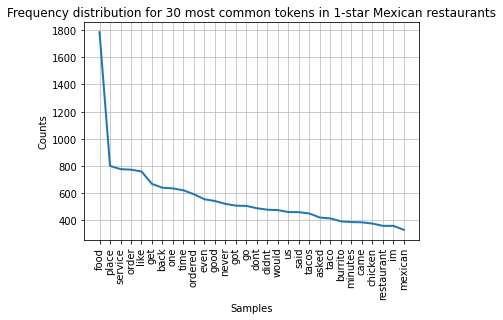

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in 1-star Mexican restaurants'}, xlabel='Samples', ylabel='Counts'>

In [223]:
bad_mexi_words.plot(30,title='Frequency distribution for 30 most common tokens in 1-star Mexican restaurants')

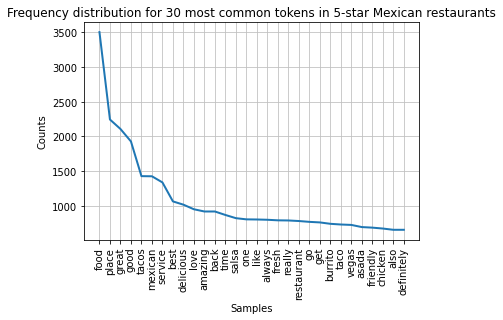

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in 5-star Mexican restaurants'}, xlabel='Samples', ylabel='Counts'>

In [222]:
good_mexi_words.plot(30,title='Frequency distribution for 30 most common tokens in 5-star Mexican restaurants')